In [1]:
from tools.tools_database import *

Dataset = Read_data('./Data/TGV.csv')

map_ = Display_network(Dataset)

map_

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-pegdln3e because the default path (/home/agitated_curran/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
/home/agitated_curran/workdir/Machine Learning/My_projects/prediction-de-retards-tgv-td3-groupe-1/tools/tools_database.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if len(Dataset[Dataset['gare_depart']==S[i]][Dataset['gare_arrivee']==S[j]]) or  len(Dataset[Dataset['gare_depart']==S[j]][Dataset['gare_arrivee']==S[i]]):


In [2]:
map_ = Display_map_delays(Dataset, column='delay')

map_

In [3]:
map_ = Display_map_delays(Dataset, column='nb_train_retard_arrivee')

map_

/home/agitated_curran/workdir/Machine Learning/My_projects/prediction-de-retards-tgv-td3-groupe-1/tools/tools_database.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if len(Dataset[Dataset['gare_depart']==S[i]][Dataset['gare_arrivee']==S[j]]) or  len(Dataset[Dataset['gare_depart']==S[j]][Dataset['gare_arrivee']==S[i]]):


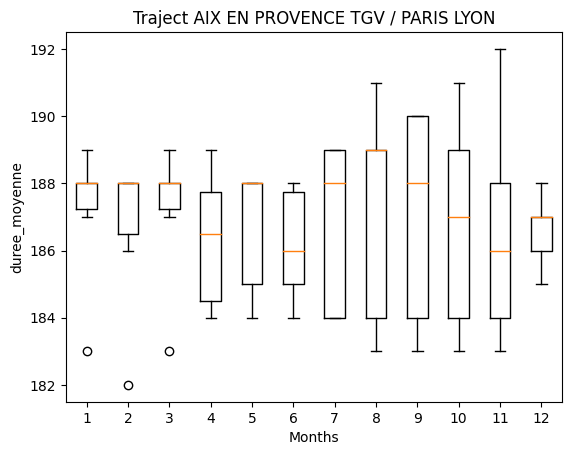

In [4]:
A = np.unique(Dataset['gare_depart'])

station_coordinates = Load_coords()
Net = Build_network(station_coordinates, Dataset, A)

for i in range(len(A)) :
    for j in range(len(A)) :
        if i!=j and Net[i, j] :
            Box_plot_months(Dataset, A[i], A[j], 'duree_moyenne')
            break
    break

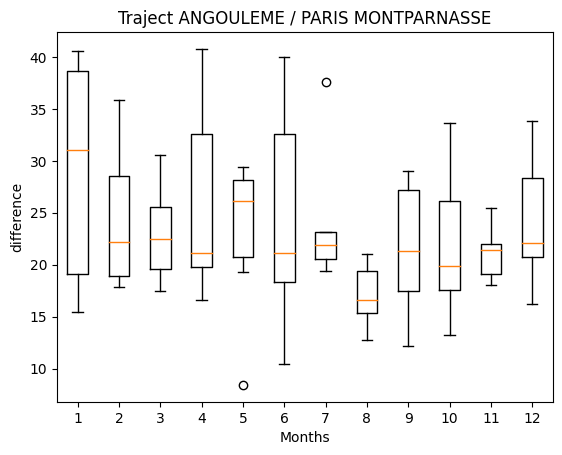

In [5]:
Dataset['difference'] = Dataset['retard_moyen_arrivee'] - Dataset['retard_moyen_depart']


for i in range(2, len(A)) :
    for j in range(len(A)) :
        if i!=j and Net[i, j] :
            Box_plot_months(Dataset, A[i], A[j], 'difference')
            
    break

In [6]:
Dataset.columns

Index(['date', 'service', 'gare_depart', 'gare_arrivee', 'duree_moyenne',
       'nb_train_prevu', 'nb_annulation', 'commentaire_annulation',
       'nb_train_depart_retard', 'retard_moyen_depart',
       'retard_moyen_tous_trains_depart', 'commentaire_retards_depart',
       'nb_train_retard_arrivee', 'retard_moyen_arrivee',
       'retard_moyen_tous_trains_arrivee', 'commentaires_retard_arrivee',
       'nb_train_retard_sup_15', 'retard_moyen_trains_retard_sup15',
       'nb_train_retard_sup_30', 'nb_train_retard_sup_60',
       'prct_cause_externe', 'prct_cause_infra', 'prct_cause_gestion_trafic',
       'prct_cause_materiel_roulant', 'prct_cause_gestion_gare',
       'prct_cause_prise_en_charge_voyageurs', 'difference'],
      dtype='object')

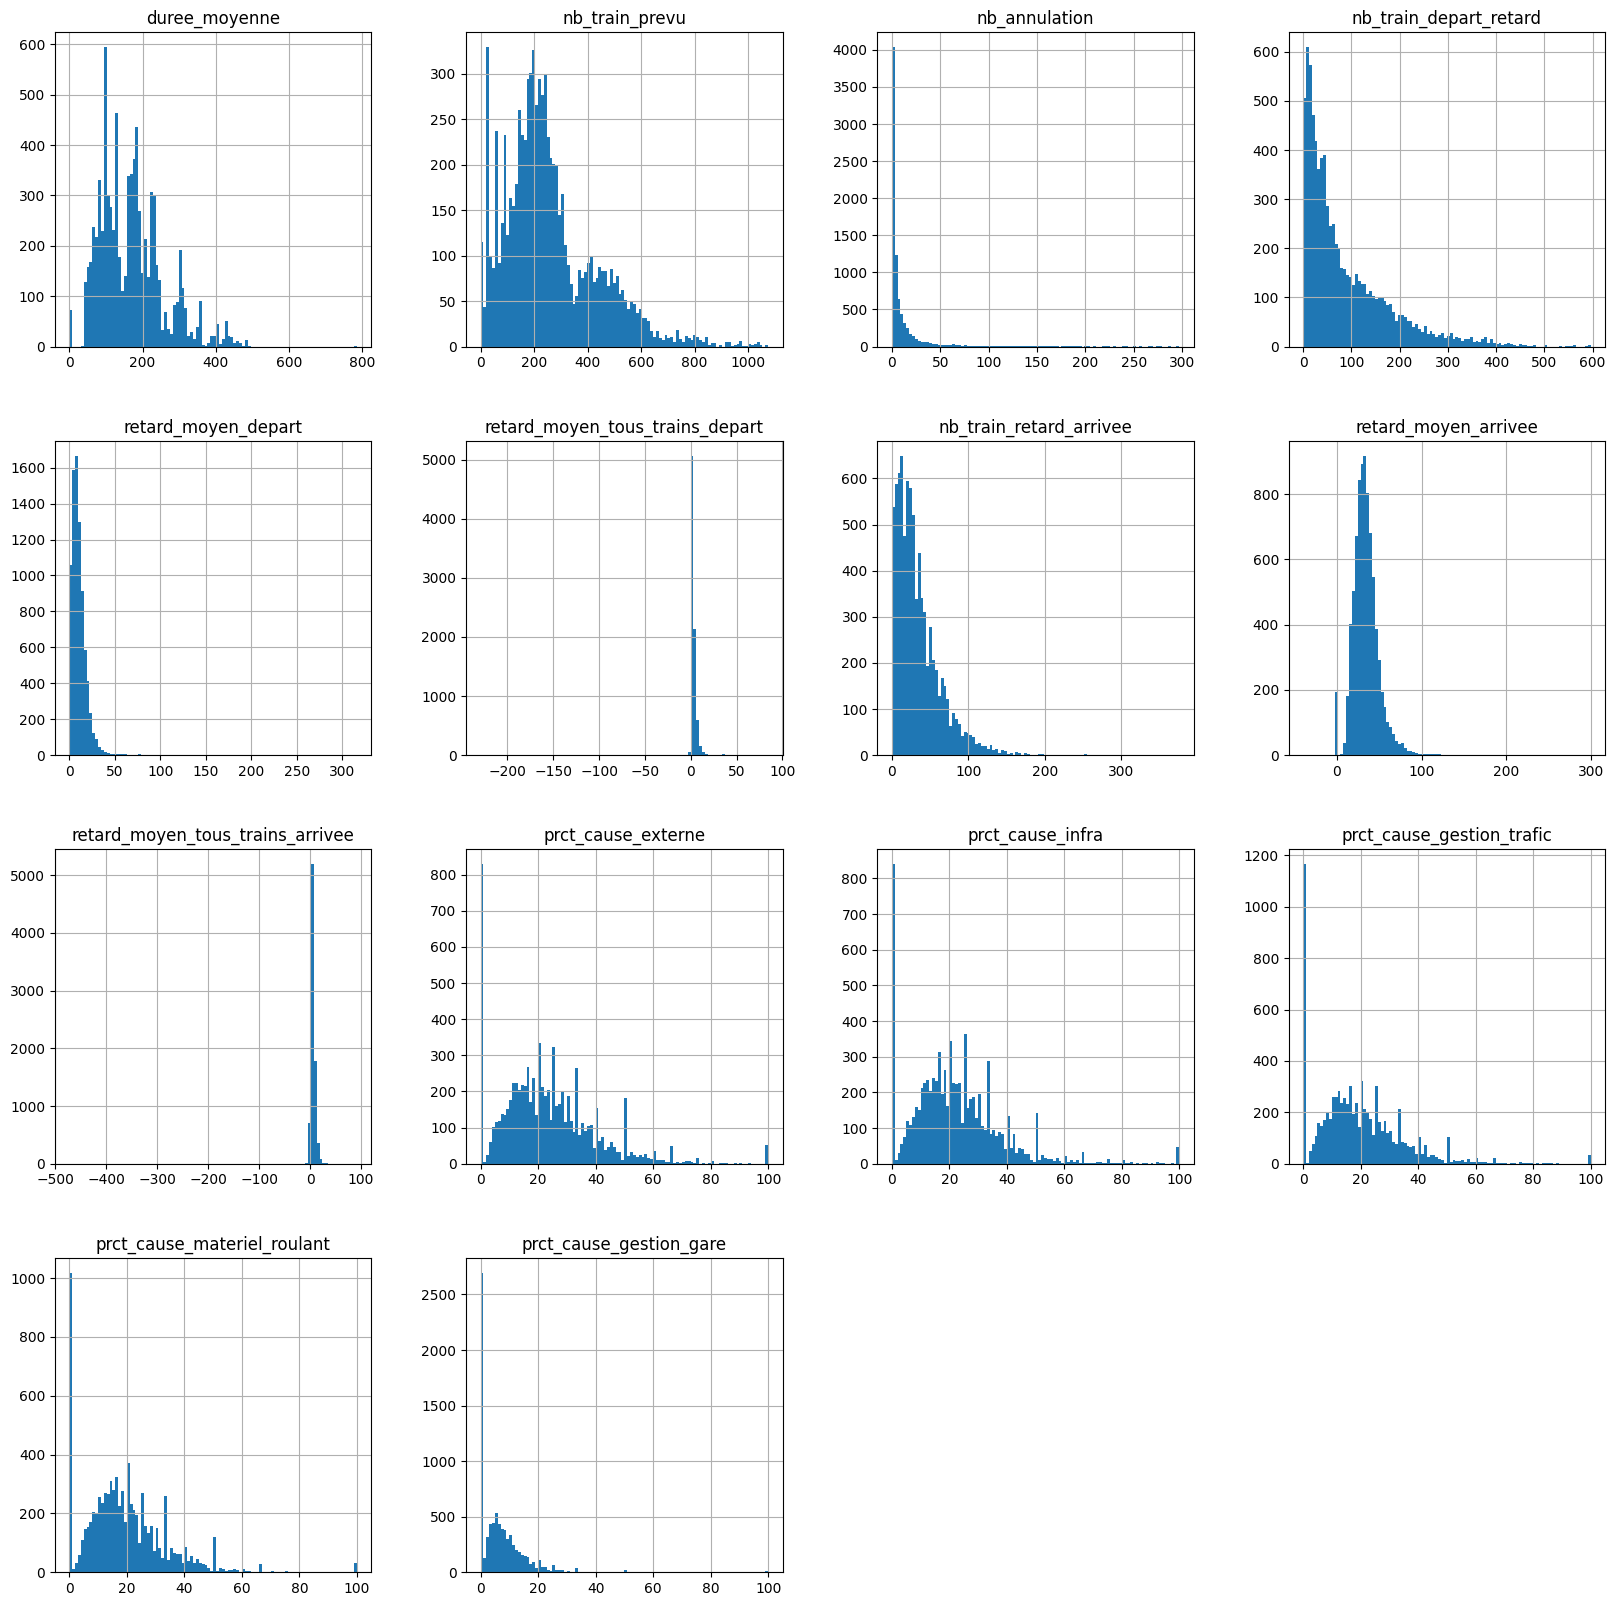

In [7]:
Cols = ['duree_moyenne', 'nb_train_prevu', 'nb_annulation', 'nb_train_depart_retard', 'retard_moyen_depart',
       'retard_moyen_tous_trains_depart', 'nb_train_retard_arrivee', 'retard_moyen_arrivee',
       'retard_moyen_tous_trains_arrivee', 'prct_cause_externe', 'prct_cause_infra', 'prct_cause_gestion_trafic',
       'prct_cause_materiel_roulant', 'prct_cause_gestion_gare']

Histograms(Dataset, Cols)